# Classification Assigment

In [2]:
# dataset upload
import pandas as pd 

ds = pd.read_csv("model.csv")
ds

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


Target
0    69878
1    32473
dtype: int64


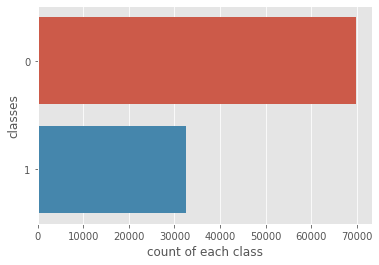

In [28]:
# Look at imbalancing of target
print(ds.groupby('Target').size()) #"target" is the name of the target column, change it accordingly to your dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=ds.Target ,data=ds) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

## Data pre-processing: DATA PREPARATION (validation, transformation, reduction) AND ESPLORATION (univ, bivar, multivar)
### -- DATA VALIDATION --

In [30]:
# missing data

nan = ds.isna()
nan.sum(axis = 0, skipna = True) #5091 missing data from License_Type -> 4.97% with value 0/1 
# -> I think we should eliminate the row

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [14]:
# inconsistency
# check if there are duplicate
ds["id"].unique()

# no duplicate all value seems correct -> no inconsistency

array([0, 1], dtype=int64)

count    100286.000000
mean      29671.586353
std       15190.289901
min        2630.000000
25%       24218.250000
50%       31659.000000
75%       39151.750000
max       65835.000000
Name: Annual_Premium, dtype: float64

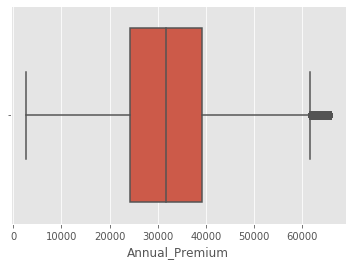

In [147]:
# noisy data (outliers) -> has sense doing that only for: Age; Region_Code; Annual_Premium; Policy_Sales_Channel; Seniority
import numpy as np

%matplotlib inline
import seaborn as sns

#sns.boxplot(x = ds['Age']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Region_Code']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Annual_Premium'])
#sns.boxplot(x = ds['Policy_Sales_Channel']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Seniority']) # Do not have outilers. all data keeped.

#ds["Annual_Premium"].describe()

#since it is normal then I CAN REMOVE OUTLIERS Using Normal Distribution and S.D
mean = ds["Annual_Premium"].mean()
sd = ds["Annual_Premium"].std()

# keep only the ones that are within +x to -x standard deviations in the column DIS
x = 2 # with 2 -> eliminate 2%, with 1 -> eliminate 28%
Annual_Premium = ds["Annual_Premium"]
Annual_Premium_noOutlier = Annual_Premium[ np.abs(Annual_Premium - mean) <= x * sd ]

#sns.boxplot(x = ds['Annual_Premium'])
sns.boxplot(x = Annual_Premium_noOutlier)

#ds["Annual_Premium"].describe()
Annual_Premium_noOutlier.describe()

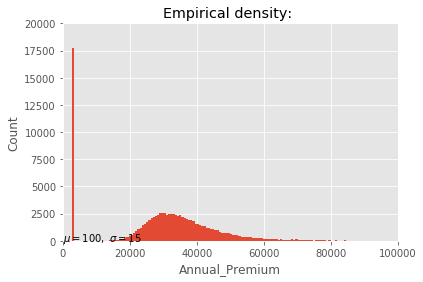

In [97]:
ds.hist(column="Annual_Premium",bins='auto')

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 20000)
plt.grid(True)
plt.show()

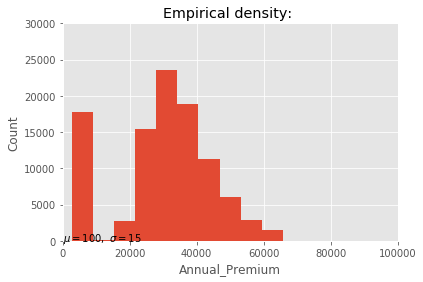

In [98]:
Annual_Premium_noOutlier.hist()

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 30000)
plt.grid(True)
plt.show()

In [156]:
# eliminate outliers data from ds
Annual_Premium_noOutlier1 = np.array(Annual_Premium_noOutlier.index)
ds_index = np.array(ds.index )
Annual_Premium_Outlier = np.delete(ds_index, Annual_Premium_noOutlier1)

ds1 = ds.drop(Annual_Premium_Outlier)


ds1


,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
5,6,Female,40,1,A,8,No,1-2 Year,Yes,34092,124,285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


In [15]:
# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location,
# asimmetry of density curve, kurtosis

ds.describe()

,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority,Target
count,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000
mean,51176.000000,39.867339,0.950259,26.519936,30748.636398,107.407900,154.527030,0.317271
std,29546.333038,14.935793,0.217410,12.904874,17544.726810,55.327295,83.735221,0.465416
min,1.000000,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25588.500000,25.000000,1.000000,15.000000,24435.500000,26.000000,82.000000,0.000000
50%,51176.000000,39.000000,1.000000,28.000000,31943.000000,124.000000,155.000000,0.000000
75%,76763.500000,50.000000,1.000000,35.000000,39774.000000,152.000000,227.000000,1.000000
max,102351.000000,85.000000,1.000000,52.000000,540165.000000,163.000000,299.000000,1.000000


### -- DATA TRANSFORMATION --

In [ ]:
# standardization (!! in classification tree no standardization !!)

# ...code...

# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location,
# asimmetry of density curve, kurtosis

# ...code...

# check if normal probability fall in a streight line

# ...code...

In [ ]:
# feature extraction (make num atribute 2,4,6,7; new atributes; ...)

# ...code...

# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location

# ...code...

# check if normal probability fall in a streight line

# ...code...

### -- DATA REDUCTION --

In [ ]:
# reduce the number of obs (if needed) -> SAMPLING

# ...code...

In [ ]:
# reduce the number of feature/atributes 
# -> FEATURE SELECTION (filter [we can filter by correlation with target], wrapper)
# (!! no need in classification tree !! embedded)

# ...code...

# -> PCA

# ...code...

In [ ]:
# reduce the number of value (discretization -> pg 123 in pdf)

# ...code...

In [ ]:
# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location

# ...code...

# check if normal probability fall in a streight line

# ...code...

## Models

In [ ]:
# models

# ...code...